In [50]:
import numpy as np
from math import degrees
from scipy.spatial.transform import Rotation as R


pose_vec = np.loadtxt("data/jiahao_test4.txt")[10:]

vins_time = pose_vec[:,0]
optitrack_time = pose_vec[:,8]
t265_time = pose_vec[:,16]
vins_t = pose_vec[:,1:4]
vins_q = pose_vec[:,4:8]
optitrack_t = pose_vec[:,9:12]
optitrack_q = pose_vec[:,12:16]
t265_t = pose_vec[:,17:20]
t265_q = pose_vec[:,20:24]


vins_num = vins_t.shape[0]
vins_t = vins_t + (optitrack_t[0]-vins_t[0])
t265_t = t265_t + (optitrack_t[0]-t265_t[0])

init_time = vins_time[0]
for i in range(vins_time.shape[0]):
    vins_time[i] = vins_time[i] - init_time
    optitrack_time[i] = optitrack_time[i] - init_time
    t265_time[i] = t265_time[i] - init_time


vins_euler = []
optitrack_euler = []
t265_euler = []
for i in range(vins_time.shape[0]):
    # 创建旋转矩阵
    r = R.from_quat([vins_q[i,0], vins_q[i,1], vins_q[i,2], vins_q[i,3]])
    # 将旋转矩阵转换为欧拉角
    yaw, pitch, roll = r.as_euler('zyx', degrees=True)
    vins_euler.append([yaw,pitch,roll])
    
    # q = np.quaternion(optitrack_q[i,3],optitrack_q[i,0],optitrack_q[i,1],optitrack_q[i,2])
    # 创建旋转矩阵
    r = R.from_quat([optitrack_q[i,0],optitrack_q[i,1],optitrack_q[i,2],optitrack_q[i,3]])
    # 将旋转矩阵转换为欧拉角
    yaw, pitch, roll = r.as_euler('zyx', degrees=True)
    optitrack_euler.append([yaw,pitch,roll])
    
    # q = np.quaternion(t265_q[i,3],t265_q[i,0],t265_q[i,1],t265_q[i,2])
    # 创建旋转矩阵
    r = R.from_quat([t265_q[i,0],t265_q[i,1],t265_q[i,2],t265_q[i,3]])
    # 将旋转矩阵转换为欧拉角
    yaw, pitch, roll = r.as_euler('zyx', degrees=True)
    t265_euler.append([yaw,pitch,roll])
    
vins_euler = np.array(vins_euler)
optitrack_euler = np.array(optitrack_euler)
t265_euler = np.array(t265_euler)


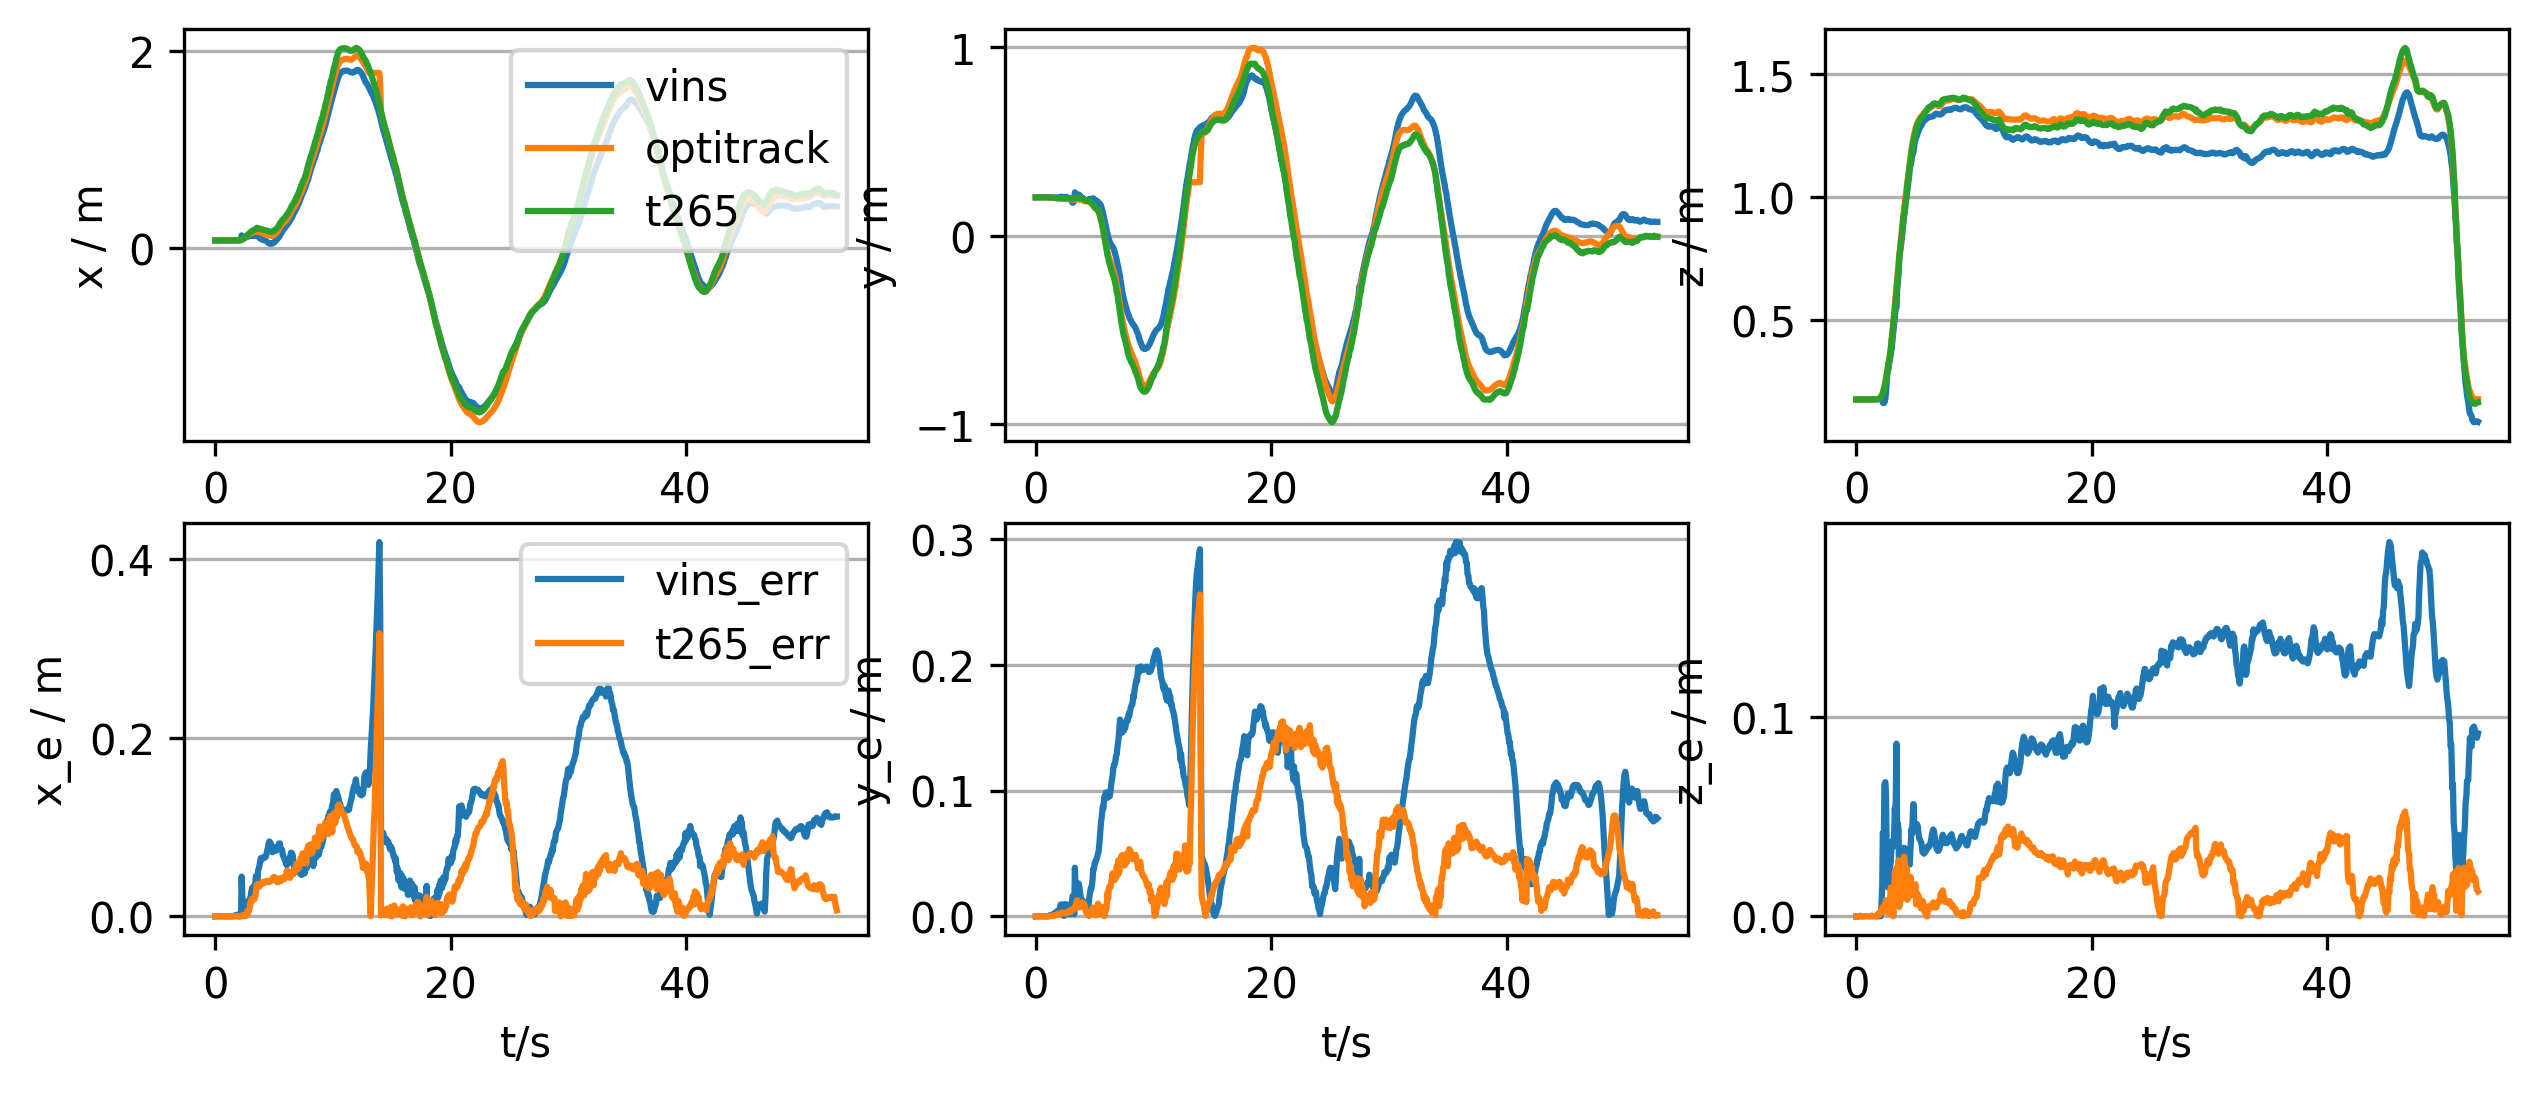

In [51]:
from matplotlib.pyplot import title
import matplotlib.pyplot as plt


fig = plt.figure(dpi=300,figsize=(10,4))

ax = fig.add_subplot(231)
ax.plot(vins_time,vins_t[:,0],label='vins')
ax.plot(vins_time,optitrack_t[:,0],label='optitrack')
ax.plot(vins_time,t265_t[:,0],label='t265')
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("x / m")
ax.legend(loc='upper right')#绘制曲线图例，信息来自类型label

ax = fig.add_subplot(232)
ax.plot(vins_time,vins_t[:,1],label='vins')
ax.plot(vins_time,optitrack_t[:,1],label='optitrack')
ax.plot(vins_time,t265_t[:,1],label='t265')
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("y / m")


ax = fig.add_subplot(233)
ax.plot(vins_time,vins_t[:,2],label='vins')
ax.plot(vins_time,optitrack_t[:,2],label='optitrack')
ax.plot(vins_time,t265_t[:,2],label='t265')
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("z / m")



ax = fig.add_subplot(234)
ax.plot(vins_time,np.abs(vins_t[:,0]-optitrack_t[:,0]),label="vins_err")
ax.plot(vins_time,np.abs(t265_t[:,0]-optitrack_t[:,0]),label="t265_err")
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("x_e / m")
ax.legend(loc='upper right')#绘制曲线图例，信息来自类型label


ax = fig.add_subplot(235)
ax.plot(vins_time,np.abs(vins_t[:,1]-optitrack_t[:,1]),label="vins_err")
ax.plot(vins_time,np.abs(t265_t[:,1]-optitrack_t[:,1]),label="t265_err")
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("y_e / m")


ax = fig.add_subplot(236)
ax.plot(vins_time,np.abs(vins_t[:,2]-optitrack_t[:,2]),label="vins_err")
ax.plot(vins_time,np.abs(t265_t[:,2]-optitrack_t[:,2]),label="t265_err")
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("z_e / m")



plt.show()
# fig.savefig("pose_err.jpg",dpi=300, bbox_inches = 'tight')

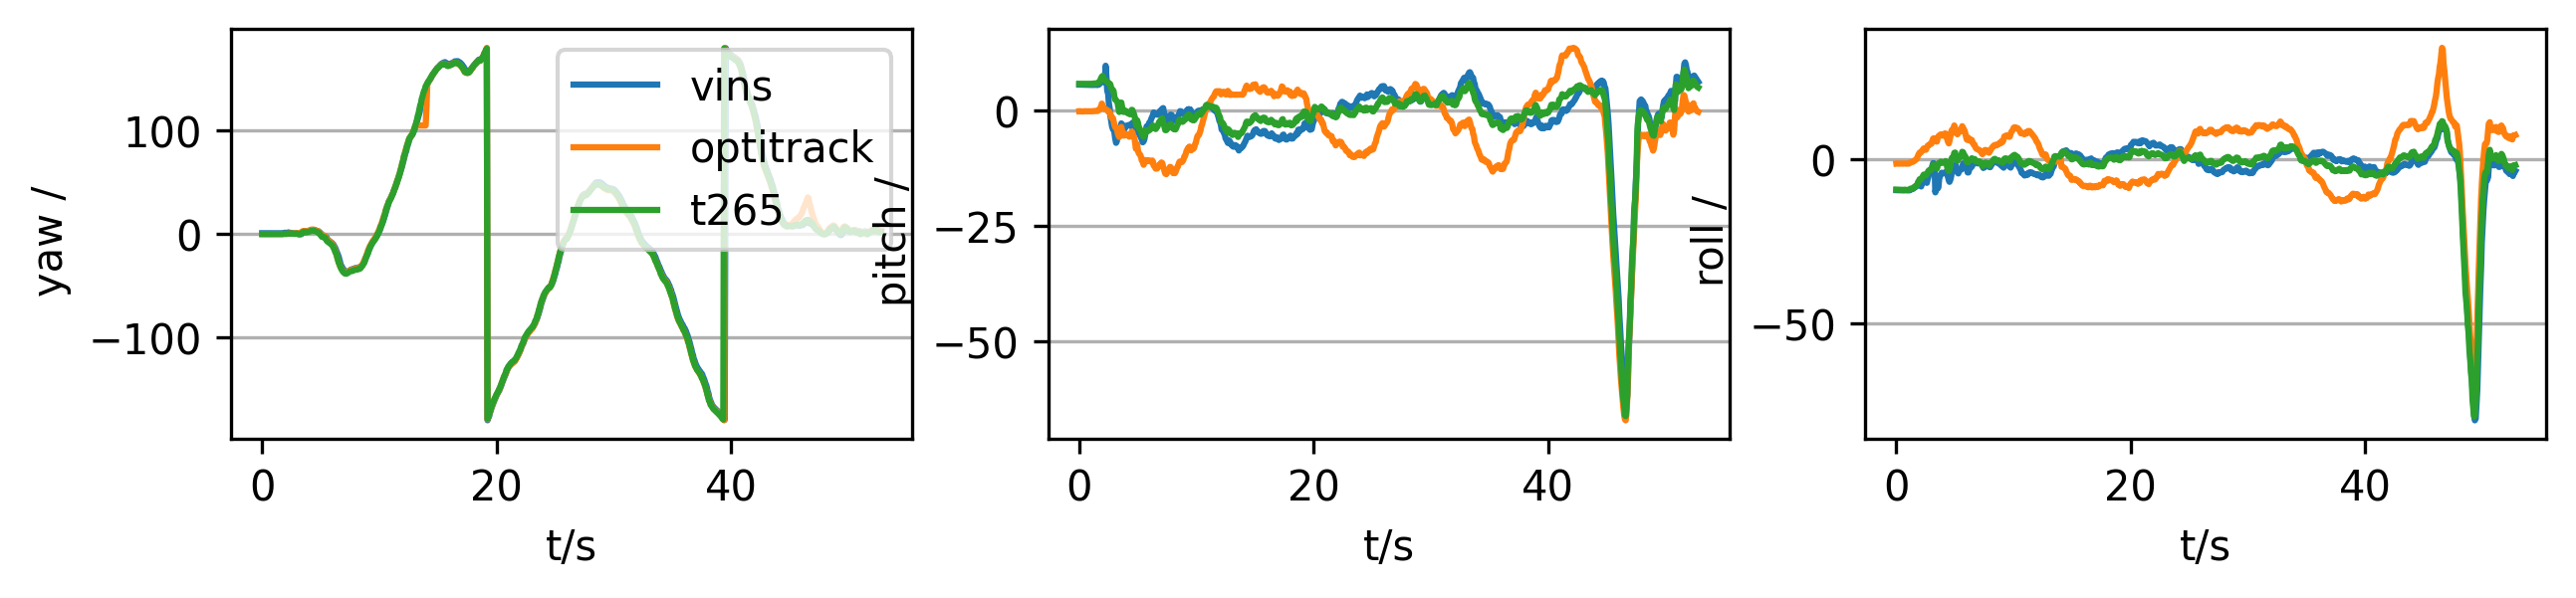

In [52]:
from matplotlib.pyplot import title
import matplotlib.pyplot as plt


fig = plt.figure(dpi=300,figsize=(10,4))

ax = fig.add_subplot(231)
ax.plot(vins_time,vins_euler[:,0],label='vins')
ax.plot(vins_time,optitrack_euler[:,0],label='optitrack')
ax.plot(vins_time,t265_euler[:,0],label='t265')
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("yaw / ")
ax.legend(loc='upper right')#绘制曲线图例，信息来自类型label

ax = fig.add_subplot(232)
ax.plot(vins_time,vins_euler[:,1],label='vins')
ax.plot(vins_time,optitrack_euler[:,1],label='optitrack')
ax.plot(vins_time,t265_euler[:,1],label='t265')
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("pitch / ")


ax = fig.add_subplot(233)
ax.plot(vins_time,vins_euler[:,2],label='vins')
ax.plot(vins_time,optitrack_euler[:,2],label='optitrack')
ax.plot(vins_time,t265_euler[:,2],label='t265')
ax.grid(axis='y')
ax.set_xlabel("t/s")
ax.set_ylabel("roll / ")



# ax = fig.add_subplot(234)
# ax.plot(vins_time,np.abs(vins_t[:,0]-optitrack_t[:,0]),label="vins_err")
# ax.plot(vins_time,np.abs(t265_t[:,0]-optitrack_t[:,0]),label="t265_err")
# ax.grid(axis='y')
# ax.set_xlabel("t/s")
# ax.set_ylabel("x_e / m")
# ax.legend(loc='upper right')#绘制曲线图例，信息来自类型label


# ax = fig.add_subplot(235)
# ax.plot(vins_time,np.abs(vins_t[:,1]-optitrack_t[:,1]),label="vins_err")
# ax.plot(vins_time,np.abs(t265_t[:,1]-optitrack_t[:,1]),label="t265_err")
# ax.grid(axis='y')
# ax.set_xlabel("t/s")
# ax.set_ylabel("y_e / m")


# ax = fig.add_subplot(236)
# ax.plot(vins_time,np.abs(vins_t[:,2]-optitrack_t[:,2]),label="vins_err")
# ax.plot(vins_time,np.abs(t265_t[:,2]-optitrack_t[:,2]),label="t265_err")
# ax.grid(axis='y')
# ax.set_xlabel("t/s")
# ax.set_ylabel("z_e / m")



plt.show()
# fig.savefig("pose_err.jpg",dpi=300, bbox_inches = 'tight')